In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [ ]:
boston = load_boston()
boston.keys()
#print(boston['DESCR'])

##Preparing The Dataset

In [6]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['Price'] = boston.target
#dataset.head()
#dataset.info()
#dataset.describe()
#dataset.isnull().sum() # check for missing values

##Correlation of Dataset

In [ ]:
dataset.corr()

In [ ]:
#sns.pairplot(dataset)

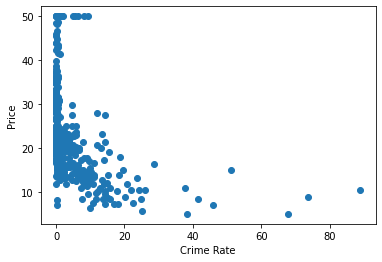

In [9]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.show()

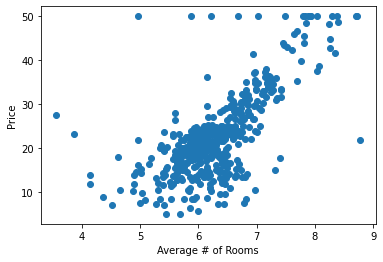

In [10]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel("Average # of Rooms")
plt.ylabel("Price")
plt.show()

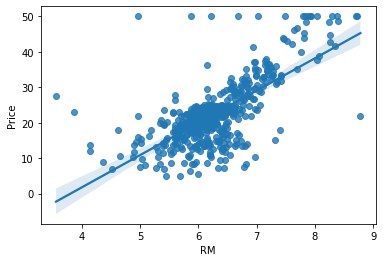

In [ ]:
sns.regplot(x="RM", y="Price", data=dataset)

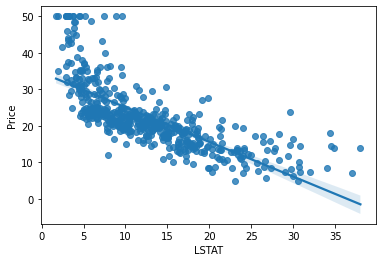

In [ ]:
sns.regplot(x="LSTAT", y="Price", data=dataset)

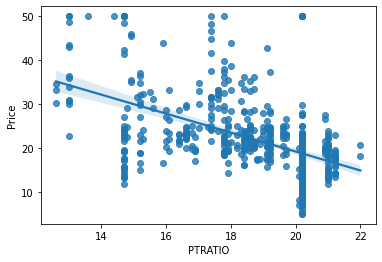

In [11]:
sns.regplot(x="PTRATIO", y="Price", data=dataset)

##Splitting into dependent vs independent

In [12]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

In [ ]:
print(f"Ce-Efs: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")
print(f"Regression params: {regression.get_params()}")

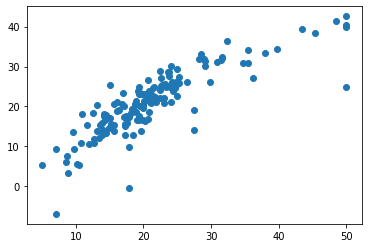

In [28]:
#plt.scatter(y_test, y_pred)


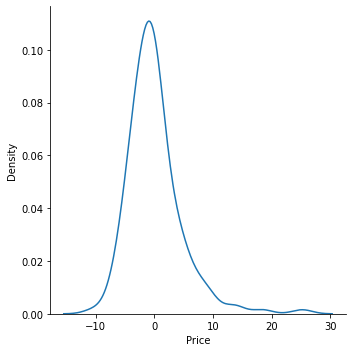

In [30]:
# Error plot
residuals = y_test - y_pred
sns.displot(residuals, kind="kde")

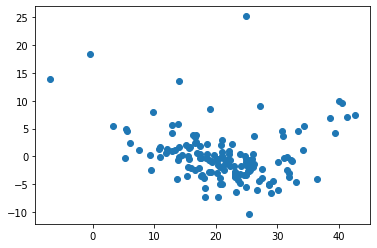

In [31]:
# uniform distributed scatter plot with respect to predictions and residuals
plt.scatter(y_pred, residuals)

In [32]:
# more performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"Mean ABS error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean SQD error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean SQD error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean ABS error: 3.162709871457406
Mean SQD error: 21.51744423117721
Root Mean SQD error: 4.6386899261728205


$R^2 = 1 - SSR/SST$

where $R^2$ is the coefficient of determination, $SSR$ is the sum of squares of residuals, and $SST$ is total sum of squares.

In [34]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7112260057484932


$Adjusted$ $R^2 = 1 - [(1-R^2)*(n-1)/(n-k-1)]$

where $R^2$ is the coefficient of determination, $SSR$ is the sum of squares of residuals, and $SST$ is total sum of squares.

In [35]:
# R squared and adjusted R squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639308

In [44]:
x_validate = scaler.transform(boston.data[0].reshape(1,-1))
regression.predict(x_validate)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([30.08649576])

In [46]:
import pickle
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [49]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))
pickled_model.predict(x_validate)

array([30.08649576])